In [25]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [26]:
df=pd.read_csv('pulsar_stars.csv')
df.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2020)


/home/pigeon/Downloads/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target_class', ylabel='count'>

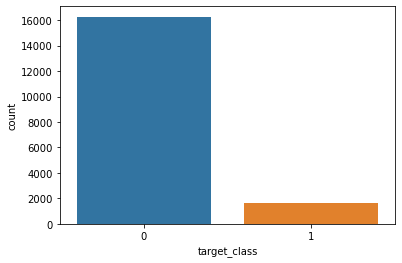

In [28]:
sns.countplot(df['target_class'])

/home/pigeon/Downloads/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target_class', ylabel='count'>

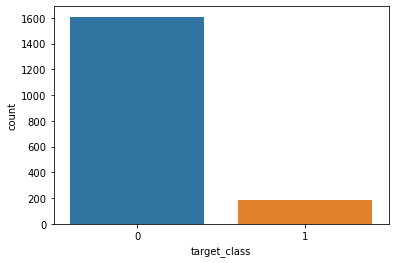

In [29]:
sns.countplot(y_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

logreg=LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

score_imbalanced=roc_auc_score(y_pred,y_test)

/home/pigeon/Downloads/yes/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
score_imbalanced

0.96378784393724

<h3>vae oversampling</h3>


In [32]:
from launchpad import VAEify 

X_vae,y_vae=VAEify(X_train,y_train)

logreg.fit(X_vae,y_vae)

y_pred_vae=logreg.predict(X_test)

score_vae=roc_auc_score(y_pred_vae,y_test)

Minority and Majority class are:  1 0
Rows of the Org min 8
MIN,MAJ,Desired (1457, 8) (14651, 8) 13194
Train Epoch: 1 [0/1457 (0%)]	Loss: 5.570508
Train Epoch: 1 [10/1457 (1%)]	Loss: 5.229959
Train Epoch: 1 [20/1457 (1%)]	Loss: 4.518190
Train Epoch: 1 [30/1457 (2%)]	Loss: 4.393605
Train Epoch: 1 [40/1457 (3%)]	Loss: 4.176116
Train Epoch: 1 [50/1457 (3%)]	Loss: 5.249683
Train Epoch: 1 [60/1457 (4%)]	Loss: 4.729216
Train Epoch: 1 [70/1457 (5%)]	Loss: 4.582911
Train Epoch: 1 [80/1457 (5%)]	Loss: 4.248406
Train Epoch: 1 [90/1457 (6%)]	Loss: 4.104414
Train Epoch: 1 [100/1457 (7%)]	Loss: 3.946732
Train Epoch: 1 [110/1457 (8%)]	Loss: 4.392620
Train Epoch: 1 [120/1457 (8%)]	Loss: 3.967868
Train Epoch: 1 [130/1457 (9%)]	Loss: 4.469131
Train Epoch: 1 [140/1457 (10%)]	Loss: 4.118847
Train Epoch: 1 [150/1457 (10%)]	Loss: 3.986151
Train Epoch: 1 [160/1457 (11%)]	Loss: 5.226358
Train Epoch: 1 [170/1457 (12%)]	Loss: 4.199789
Train Epoch: 1 [180/1457 (12%)]	Loss: 4.275544
Train Epoch: 1 [190/1457 (13%

/home/pigeon/Downloads/yes/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<h2>WGAN</h2>

In [33]:
from launchpad import WGANify

X_wgan,y_wgan=WGANify(X_train,y_train)



/home/pigeon/Downloads/yes/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


[ 7560/7560] LG:0.509 LD:-0.134 D:-0.020 GP:0.008 AC: 0.361 RMSEAVG:0.296 NUM:0.257 SynTraiAuc:0.076 RFAcc:1.000   


In [34]:
logreg.fit(X_wgan,y_wgan)

y_pred_wgan=logreg.predict(X_test)

score_wgan=roc_auc_score(y_pred_wgan,y_test)

/home/pigeon/Downloads/yes/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


/home/pigeon/Downloads/yes/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

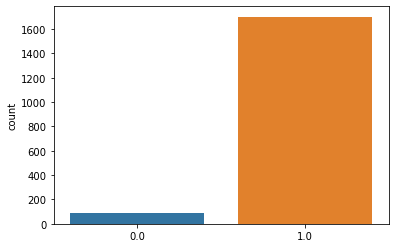

In [35]:
sns.countplot(y_pred_wgan)

<h3> SMOTE </h3>

In [36]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

logreg.fit(X_smote,y_smote)

y_pred_smote=logreg.predict(X_test)

score_smote=roc_auc_score(y_pred_smote,y_test)

/home/pigeon/Downloads/yes/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
